In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_pickle('testingdf2.pkl')
df = df.replace(pd.NA, np.nan)
df

,76561198153524465,76561198041864324,76561198110981529,76561198078042697,76561198072956091,76561198044215451,76561198117910816,76561198067369254,76561198095881349,76561198160606109,...,76561198064051588,76561198065637682,76561198093942856,76561198084283944,76561198068872077,76561198090802478,76561198068470798,76561198098128800,76561198098303003,76561198060478569
570,NaN,71.0,271784.0,370587.0,30.0,127.0,NaN,68001.0,28686.0,NaN,...,62.0,NaN,15850.0,NaN,11081.0,NaN,NaN,17.0,11848.0,NaN
1172470,NaN,1740.0,NaN,NaN,422.0,2519.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
730,52631.0,156473.0,NaN,218577.0,56384.0,17022.0,NaN,2826.0,NaN,0.0,...,10009.0,102617.0,16021.0,9316.0,134.0,NaN,NaN,NaN,NaN,NaN
578080,7881.0,1317.0,NaN,0.0,0.0,NaN,NaN,105578.0,NaN,0.0,...,8200.0,0.0,187.0,129.0,NaN,0.0,NaN,NaN,NaN,NaN
1063730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1259970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# This cell removes all zeroes from the dataframe, if uncommented.

df = df.replace(np.nan, 0)
df = df.replace(0, np.nan)
df

,76561198153524465,76561198041864324,76561198110981529,76561198078042697,76561198072956091,76561198044215451,76561198117910816,76561198067369254,76561198095881349,76561198160606109,...,76561198064051588,76561198065637682,76561198093942856,76561198084283944,76561198068872077,76561198090802478,76561198068470798,76561198098128800,76561198098303003,76561198060478569
570,NaN,71.0,271784.0,370587.0,30.0,127.0,NaN,68001.0,28686.0,NaN,...,62.0,NaN,15850.0,NaN,11081.0,NaN,NaN,17.0,11848.0,NaN
1172470,NaN,1740.0,NaN,NaN,422.0,2519.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,52631.0,156473.0,NaN,218577.0,56384.0,17022.0,NaN,2826.0,NaN,NaN,...,10009.0,102617.0,16021.0,9316.0,134.0,NaN,NaN,NaN,NaN,NaN
578080,7881.0,1317.0,NaN,NaN,NaN,NaN,NaN,105578.0,NaN,NaN,...,8200.0,NaN,187.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN
1063730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1259970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
class MFRecommender():
    """
    Matrix factorization recommender model object.
    
    Attributes:
        game_weights (np.array): matrix of weights corresponding to user 
            profile weights for each game.
        user_weights (np.array): matrix of weights corresponding to how to 
            represent each user as a linear combination of user profiles.
        filled_entries (List[tuple(int)]): list of index pairs (i,j) of the
            non-null entries of df. 
        lr (float): learning rate
        l2 (float): size of the l2 penalty when fitting and predicting.
        df (pd.DataFrame): pandas dataframe representing the sparse matrix
            of data
    """
    
    
    def __init__(self, df, k, lr=0.0002, l2=0.00001, val_split=0.15):
        """
        Initializes the model.
        
        Args:
            df (pd.DataFrame): sparse dataframe of user playtime info.
            k (int): Number of user profiles for the model.
            lr (float): learning rate for SGD.
            l2 (float): l2 penalty for training the weights.
        """
        self.df = df
        self.game_weights = np.random.rand(df.shape[0],k)
        self.user_weights = np.random.rand(k, df.shape[1])
        self.filled_entries = []
        self.lr = lr
        self.l2 = l2
        for i in range(df.shape[0]):
            for j in range(df.shape[1]):
                if not pd.isna(df.iat[i,j]):
                    self.filled_entries.append((i,j))
        self.fe_train, self.fe_valid = train_test_split(self.filled_entries, 
                                                       test_size=val_split)
        
    
    
    def fit(self, epochs):
        """
        Fits the model a certain number of epochs based on the df provided.
        Args:
            epochs (int): number of epochs to train the model
        """
        for k in range(epochs):
            print('Fitting epoch {}...'.format(k+1))
            pred = np.matmul(self.game_weights, self.user_weights)
            t_game_weights = np.copy(self.game_weights)
            t_user_weights = np.copy(self.user_weights)
            
            # apply l2 penalty
            self.game_weights = t_game_weights*(1 - self.lr*self.l2)
            self.user_weights = t_user_weights*(1 - self.lr*self.l2)
            
            # Update with SGD
            for i, j in self.fe_train:
                for l in range(self.user_weights.shape[0]):
                    diff = (self.df.iat[i,j]-pred[i,j])
                    self.game_weights[i,l] += self.lr*t_user_weights[l,j]*diff
                    self.user_weights[l,j] += self.lr*t_game_weights[i,l]*diff
            print('Train MSE = {:.5f}     '.format(self.train_MSE())
                 + 'Validation MSE = {:.5f}'.format(self.valid_MSE()))
    
    
    def train_loss(self):
        loss = 0
        pred = np.matmul(self.game_weights, self.user_weights)
        for i, j in self.fe_train:
            # print(self.df.iat[i,j], pred[i,j])
            loss += (self.df.iat[i,j] - pred[i,j])**2
        return loss
    
    def valid_loss(self):
        loss = 0
        pred2 = np.matmul(self.game_weights, self.user_weights)
        for i, j in self.fe_valid:
            # print(self.df.iat[i,j], pred[i,j])
            loss += (self.df.iat[i,j] - pred2[i,j])**2
        return loss
    
    def train_MSE(self):
        loss = 0
        pred2 = np.matmul(self.game_weights, self.user_weights)
        for i, j in self.fe_train:
            # print(self.df.iat[i,j], pred[i,j])
            loss += (self.df.iat[i,j] - pred2[i,j])**2
        return loss/len(self.fe_train)
    
    def valid_MSE(self):
        loss = 0
        pred2 = np.matmul(self.game_weights, self.user_weights)
        for i, j in self.fe_valid:
            # print(self.df.iat[i,j], pred[i,j])
            loss += (self.df.iat[i,j] - pred2[i,j])**2
        return loss/len(self.fe_valid)
    
    def predict(self, user_data, epochs=100):
        """
        Given the data for a user, returns the predicted playtime series.
        
        Args:
            user_data (pd.series): sparse pandas series of user playtime
        
        Returns (pd.series): filled pandas series of predicted playtime.
        """
        user_profile = np.random.rand(self.user_weights.shape[0], 1)
        
        filled_indices = []
        for j in range(user_data.shape[0]):
            if not pd.isna(user_data.iat[j]):
                filled_indices.append(j)
        
        for j in range(epochs):
            #print('Fitting epoch {}...'.format(k+1))
            pred2 = np.matmul(self.game_weights, user_profile)
            #print(pred)
            t_user_weights = np.copy(user_profile)
            
            # apply l2 penalty
            user_profile = t_user_weights*(1 - self.lr*self.l2)
            
            # Update with SGD
            for i in filled_indices:
                for l in range(self.user_weights.shape[0]):
                    diff = (user_data.iat[i]-pred2[i])
                    user_profile[l] += self.lr*self.game_weights[i,l]*diff
        
        # return final prediction, converted to pandas
        to_return = user_data.copy()
        pred2 = np.matmul(self.game_weights, user_profile)
        for j in range(to_return.shape[0]):
            to_return.iat[j] = pred2[j]
            
        loss = 0
        for i in filled_indices:
            # print(self.df.iat[i,j], pred[i,j])
            loss += (user_data.iat[i] - pred2[i])**2
        print('MSE: {}'.format(loss/len(filled_indices)))
        return to_return
                
                
                
        

In [5]:
# Note that the outliers in the data will prevent convergence unless we log-normalize first.

log_df = df.applymap(lambda x: np.log10(x+1) if not np.isnan(x) else x)
log_df

,76561198153524465,76561198041864324,76561198110981529,76561198078042697,76561198072956091,76561198044215451,76561198117910816,76561198067369254,76561198095881349,76561198160606109,...,76561198064051588,76561198065637682,76561198093942856,76561198084283944,76561198068872077,76561198090802478,76561198068470798,76561198098128800,76561198098303003,76561198060478569
570,NaN,1.857332,5.434225,5.568891,1.491362,2.107210,NaN,4.832522,4.457685,NaN,...,1.799341,NaN,4.200057,NaN,4.044618,NaN,NaN,1.255273,4.073682,NaN
1172470,NaN,3.240799,NaN,NaN,2.626340,3.401401,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,4.721250,5.194442,NaN,5.339606,4.751164,4.231036,NaN,3.451326,NaN,NaN,...,4.000434,5.011224,4.204717,3.969276,2.130334,NaN,NaN,NaN,NaN,NaN
578080,3.896636,3.119915,NaN,NaN,NaN,NaN,NaN,5.023578,NaN,NaN,...,3.913867,NaN,2.274158,2.113943,NaN,NaN,NaN,NaN,NaN,NaN
1063730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1259970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
models = []
for k in [7, 4]:
    print('Training model with k={}.'.format(k))
    clf = MFRecommender(log_df, k, lr=0.0001, l2=0)
    clf.fit(200)
    models.append(clf)

Training model with k=7.
Fitting epoch 1...
Train MSE = 1.59081     Validation MSE = 1.58047
Fitting epoch 2...
Train MSE = 1.40550     Validation MSE = 1.39673
Fitting epoch 3...
Train MSE = 1.28883     Validation MSE = 1.28153
Fitting epoch 4...
Train MSE = 1.20603     Validation MSE = 1.20003
Fitting epoch 5...
Train MSE = 1.14310     Validation MSE = 1.13828
Fitting epoch 6...
Train MSE = 1.09307     Validation MSE = 1.08932
Fitting epoch 7...
Train MSE = 1.05200     Validation MSE = 1.04924
Fitting epoch 8...
Train MSE = 1.01747     Validation MSE = 1.01563
Fitting epoch 9...
Train MSE = 0.98789     Validation MSE = 0.98693
Fitting epoch 10...
Train MSE = 0.96220     Validation MSE = 0.96206
Fitting epoch 11...
Train MSE = 0.93961     Validation MSE = 0.94026
Fitting epoch 12...
Train MSE = 0.91955     Validation MSE = 0.92096
Fitting epoch 13...
Train MSE = 0.90161     Validation MSE = 0.90373
Fitting epoch 14...
Train MSE = 0.88544     Validation MSE = 0.88825
Fitting epoch 15..

Train MSE = 0.62947     Validation MSE = 0.65897
Fitting epoch 120...
Train MSE = 0.62913     Validation MSE = 0.65875
Fitting epoch 121...
Train MSE = 0.62880     Validation MSE = 0.65853
Fitting epoch 122...
Train MSE = 0.62848     Validation MSE = 0.65831
Fitting epoch 123...
Train MSE = 0.62816     Validation MSE = 0.65810
Fitting epoch 124...
Train MSE = 0.62784     Validation MSE = 0.65790
Fitting epoch 125...
Train MSE = 0.62753     Validation MSE = 0.65769
Fitting epoch 126...
Train MSE = 0.62723     Validation MSE = 0.65750
Fitting epoch 127...
Train MSE = 0.62692     Validation MSE = 0.65730
Fitting epoch 128...
Train MSE = 0.62663     Validation MSE = 0.65711
Fitting epoch 129...
Train MSE = 0.62634     Validation MSE = 0.65692
Fitting epoch 130...
Train MSE = 0.62605     Validation MSE = 0.65674
Fitting epoch 131...
Train MSE = 0.62577     Validation MSE = 0.65656
Fitting epoch 132...
Train MSE = 0.62549     Validation MSE = 0.65639
Fitting epoch 133...
Train MSE = 0.62522 

Train MSE = 0.77245     Validation MSE = 0.80448
Fitting epoch 38...
Train MSE = 0.76606     Validation MSE = 0.79843
Fitting epoch 39...
Train MSE = 0.76003     Validation MSE = 0.79272
Fitting epoch 40...
Train MSE = 0.75433     Validation MSE = 0.78734
Fitting epoch 41...
Train MSE = 0.74894     Validation MSE = 0.78225
Fitting epoch 42...
Train MSE = 0.74385     Validation MSE = 0.77744
Fitting epoch 43...
Train MSE = 0.73902     Validation MSE = 0.77289
Fitting epoch 44...
Train MSE = 0.73443     Validation MSE = 0.76858
Fitting epoch 45...
Train MSE = 0.73009     Validation MSE = 0.76449
Fitting epoch 46...
Train MSE = 0.72595     Validation MSE = 0.76060
Fitting epoch 47...
Train MSE = 0.72203     Validation MSE = 0.75691
Fitting epoch 48...
Train MSE = 0.71829     Validation MSE = 0.75340
Fitting epoch 49...
Train MSE = 0.71473     Validation MSE = 0.75006
Fitting epoch 50...
Train MSE = 0.71133     Validation MSE = 0.74688
Fitting epoch 51...
Train MSE = 0.70809     Validation

Train MSE = 0.61903     Validation MSE = 0.66454
Fitting epoch 156...
Train MSE = 0.61883     Validation MSE = 0.66439
Fitting epoch 157...
Train MSE = 0.61863     Validation MSE = 0.66424
Fitting epoch 158...
Train MSE = 0.61844     Validation MSE = 0.66410
Fitting epoch 159...
Train MSE = 0.61824     Validation MSE = 0.66396
Fitting epoch 160...
Train MSE = 0.61805     Validation MSE = 0.66382
Fitting epoch 161...
Train MSE = 0.61787     Validation MSE = 0.66368
Fitting epoch 162...
Train MSE = 0.61768     Validation MSE = 0.66354
Fitting epoch 163...
Train MSE = 0.61750     Validation MSE = 0.66341
Fitting epoch 164...
Train MSE = 0.61732     Validation MSE = 0.66328
Fitting epoch 165...
Train MSE = 0.61715     Validation MSE = 0.66316
Fitting epoch 166...
Train MSE = 0.61697     Validation MSE = 0.66303
Fitting epoch 167...
Train MSE = 0.61680     Validation MSE = 0.66291
Fitting epoch 168...
Train MSE = 0.61664     Validation MSE = 0.66279
Fitting epoch 169...
Train MSE = 0.61647 

In [17]:
print('Training model with k={}.'.format(k))
clf = MFRecommender(log_df, k, lr=0.00005, l2=0)
clf.fit(200)
models.append(clf)

Training model with k=20.
Fitting epoch 1...
Train MSE = 5.28455     Validation MSE = 5.29958
Fitting epoch 2...
Train MSE = 4.16548     Validation MSE = 4.18814
Fitting epoch 3...
Train MSE = 3.45600     Validation MSE = 3.48198
Fitting epoch 4...
Train MSE = 2.96329     Validation MSE = 2.99100
Fitting epoch 5...
Train MSE = 2.60225     Validation MSE = 2.63094
Fitting epoch 6...
Train MSE = 2.32774     Validation MSE = 2.35703
Fitting epoch 7...
Train MSE = 2.11320     Validation MSE = 2.14285
Fitting epoch 8...
Train MSE = 1.94184     Validation MSE = 1.97168
Fitting epoch 9...
Train MSE = 1.80250     Validation MSE = 1.83243
Fitting epoch 10...
Train MSE = 1.68750     Validation MSE = 1.71744
Fitting epoch 11...
Train MSE = 1.59136     Validation MSE = 1.62125
Fitting epoch 12...
Train MSE = 1.51008     Validation MSE = 1.53988
Fitting epoch 13...
Train MSE = 1.44068     Validation MSE = 1.47036
Fitting epoch 14...
Train MSE = 1.38090     Validation MSE = 1.41045
Fitting epoch 15.

KeyboardInterrupt: 

In [6]:
clf = MFRecommender(log_df, 5, l2=0)
clf

KeyboardInterrupt: 

In [15]:
clf.fit(200)

Fitting epoch 1...
Train MSE = 0.63391     Validation MSE = 0.67366
Fitting epoch 2...
Train MSE = 0.63297     Validation MSE = 0.67288
Fitting epoch 3...
Train MSE = 0.63207     Validation MSE = 0.67216
Fitting epoch 4...
Train MSE = 0.63120     Validation MSE = 0.67147
Fitting epoch 5...
Train MSE = 0.63037     Validation MSE = 0.67081
Fitting epoch 6...
Train MSE = 0.62958     Validation MSE = 0.67019
Fitting epoch 7...
Train MSE = 0.62881     Validation MSE = 0.66960
Fitting epoch 8...
Train MSE = 0.62808     Validation MSE = 0.66903
Fitting epoch 9...
Train MSE = 0.62737     Validation MSE = 0.66849
Fitting epoch 10...
Train MSE = 0.62669     Validation MSE = 0.66797
Fitting epoch 11...
Train MSE = 0.62604     Validation MSE = 0.66748
Fitting epoch 12...
Train MSE = 0.62540     Validation MSE = 0.66701
Fitting epoch 13...
Train MSE = 0.62479     Validation MSE = 0.66656
Fitting epoch 14...
Train MSE = 0.62421     Validation MSE = 0.66612
Fitting epoch 15...
Train MSE = 0.62364    

Train MSE = 0.60194     Validation MSE = 0.65430
Fitting epoch 121...
Train MSE = 0.60185     Validation MSE = 0.65429
Fitting epoch 122...
Train MSE = 0.60177     Validation MSE = 0.65428
Fitting epoch 123...
Train MSE = 0.60169     Validation MSE = 0.65426
Fitting epoch 124...
Train MSE = 0.60160     Validation MSE = 0.65425
Fitting epoch 125...
Train MSE = 0.60152     Validation MSE = 0.65424
Fitting epoch 126...
Train MSE = 0.60144     Validation MSE = 0.65423
Fitting epoch 127...
Train MSE = 0.60136     Validation MSE = 0.65422
Fitting epoch 128...
Train MSE = 0.60128     Validation MSE = 0.65421
Fitting epoch 129...
Train MSE = 0.60120     Validation MSE = 0.65420
Fitting epoch 130...
Train MSE = 0.60112     Validation MSE = 0.65419
Fitting epoch 131...
Train MSE = 0.60104     Validation MSE = 0.65418
Fitting epoch 132...
Train MSE = 0.60096     Validation MSE = 0.65418
Fitting epoch 133...
Train MSE = 0.60089     Validation MSE = 0.65417
Fitting epoch 134...
Train MSE = 0.60081 

KeyboardInterrupt: 

In [8]:
clf.valid_MSE()

0.6756058611854633

In [6]:
help(MFRecommender)

Help on class MFRecommender in module __main__:

class MFRecommender(builtins.object)
 |  MFRecommender(df, k, lr=0.0002, l2=1e-05, val_split=0.15)
 |  
 |  Matrix factorization recommender model object.
 |  
 |  Attributes:
 |      game_weights (np.array): matrix of weights corresponding to user 
 |          profile weights for each game.
 |      user_weights (np.array): matrix of weights corresponding to how to 
 |          represent each user as a linear combination of user profiles.
 |      filled_entries (List[tuple(int)]): list of index pairs (i,j) of the
 |          non-null entries of df. 
 |      lr (float): learning rate
 |      l2 (float): size of the l2 penalty when fitting and predicting.
 |      df (pd.DataFrame): pandas dataframe representing the sparse matrix
 |          of data
 |  
 |  Methods defined here:
 |  
 |  __init__(self, df, k, lr=0.0002, l2=1e-05, val_split=0.15)
 |      Initializes the model.
 |      
 |      Args:
 |          df (pd.DataFrame): sparse dat

In [7]:
clf = MFRecommender(log_df, 5)

In [8]:
clf.fit(200)

Fitting epoch 1...
Train MSE = 2.01039     Validation MSE = 1.99717
Fitting epoch 2...
Train MSE = 1.64178     Validation MSE = 1.63678
Fitting epoch 3...
Train MSE = 1.42306     Validation MSE = 1.42121
Fitting epoch 4...
Train MSE = 1.27492     Validation MSE = 1.27627
Fitting epoch 5...
Train MSE = 1.16747     Validation MSE = 1.17095
Fitting epoch 6...
Train MSE = 1.08605     Validation MSE = 1.09157
Fitting epoch 7...
Train MSE = 1.02237     Validation MSE = 1.02956
Fitting epoch 8...
Train MSE = 0.97134     Validation MSE = 0.98005
Fitting epoch 9...
Train MSE = 0.92963     Validation MSE = 0.93969
Fitting epoch 10...
Train MSE = 0.89499     Validation MSE = 0.90628
Fitting epoch 11...
Train MSE = 0.86586     Validation MSE = 0.87825
Fitting epoch 12...
Train MSE = 0.84107     Validation MSE = 0.85447
Fitting epoch 13...
Train MSE = 0.81979     Validation MSE = 0.83411
Fitting epoch 14...
Train MSE = 0.80137     Validation MSE = 0.81653
Fitting epoch 15...
Train MSE = 0.78530    

Train MSE = 0.60984     Validation MSE = 0.64648
Fitting epoch 121...
Train MSE = 0.60968     Validation MSE = 0.64641
Fitting epoch 122...
Train MSE = 0.60953     Validation MSE = 0.64635
Fitting epoch 123...
Train MSE = 0.60938     Validation MSE = 0.64629
Fitting epoch 124...
Train MSE = 0.60924     Validation MSE = 0.64623
Fitting epoch 125...
Train MSE = 0.60909     Validation MSE = 0.64617
Fitting epoch 126...
Train MSE = 0.60895     Validation MSE = 0.64611
Fitting epoch 127...
Train MSE = 0.60881     Validation MSE = 0.64606
Fitting epoch 128...
Train MSE = 0.60867     Validation MSE = 0.64601
Fitting epoch 129...
Train MSE = 0.60853     Validation MSE = 0.64595
Fitting epoch 130...
Train MSE = 0.60840     Validation MSE = 0.64591
Fitting epoch 131...
Train MSE = 0.60827     Validation MSE = 0.64586
Fitting epoch 132...
Train MSE = 0.60814     Validation MSE = 0.64581
Fitting epoch 133...
Train MSE = 0.60801     Validation MSE = 0.64576
Fitting epoch 134...
Train MSE = 0.60788 

KeyboardInterrupt: 

In [11]:
#try testing with a new user
from steam import Steam
from decouple import config
with open("myapikey.txt", "r") as file:
    myapikey=file.read()
    
import os
os.environ["STEAM_API_KEY"] = myapikey
KEY = config("STEAM_API_KEY")
steam = Steam(KEY)

gamenames=pd.read_pickle('gamenames.pkl')

pd.options.display.max_rows = 986

In [21]:
# list of some people '76561198039393086','76561198009190429','76561198048895718','76561198014795926'
testid='76561198039393086'

In [22]:
int(testid) in df.columns

False

In [23]:
testsgamelist=steam.users.get_owned_games(testid)

In [24]:
testcol=pd.Series(np.nan,index=df.index)
for i in range(testsgamelist['game_count']):
    appid=testsgamelist['games'][i]['appid']
    if appid in df.index:
        if testsgamelist['games'][i]['playtime_forever']>0:
            testcol[appid]=testsgamelist['games'][i]['playtime_forever']

In [15]:
testcol

570            NaN
1172470        NaN
730           64.0
578080         NaN
1063730        NaN
440         9810.0
271590      5132.0
1599340        NaN
550         5930.0
304930         NaN
252490         NaN
230410         NaN
105600      3176.0
4000        2335.0
1245620     5693.0
236390         NaN
291550         NaN
359550         NaN
340            NaN
431960         NaN
1085660        NaN
945360       236.0
238960       527.0
218620        57.0
892970      3620.0
1091500     9882.0
1097150      481.0
242760         NaN
322330       245.0
444090         NaN
291480         NaN
346110         NaN
413150       873.0
49520       1930.0
10             NaN
272060         NaN
292030         1.0
438100      1032.0
381210         NaN
227940         NaN
1240440        NaN
227300         NaN
252950         NaN
1468810        NaN
620         1735.0
552990         NaN
739630       732.0
320            NaN
990080         NaN
1938090        NaN
386360         NaN
755790         NaN
550650      

In [25]:
testfit=clf.predict(np.log10(testcol+1))

MSE: [0.56774471]


In [26]:
results=pd.DataFrame({'game_name':gamenames,'user_data':testcol,'prediction':(10**testfit)-1})
results.sort_values("user_data")

,game_name,user_data,prediction
698780,Doki Doki Literature Club!,1.0,103.594914
464920,Surviving Mars,10.0,172.987212
504370,Battlerite,15.0,336.192741
105600,Terraria,22.0,2388.067285
363970,Clicker Heroes,22.0,884.591696
346900,AdVenture Capitalist,53.0,489.878167
582500,We Were Here,60.0,102.739380
238010,Deus Ex: Human Revolution - Director's Cut,63.0,329.966134
630,Alien Swarm,66.0,160.631663
270880,American Truck Simulator,72.0,943.393427


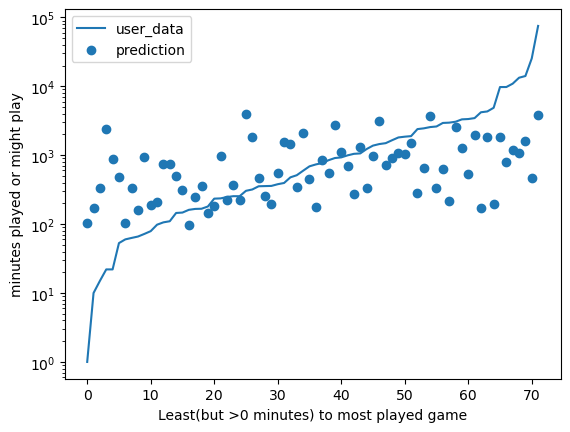

In [27]:
#graphical representation of how well the model fits

import matplotlib.pyplot as plt

lenindx=len(df.index[results['user_data']>0])
index=np.arange(lenindx)

plt.figure()
plt.yscale('log')
#plt.ylim(0,4000)
plt.xlabel('Least(but >0 minutes) to most played game')
plt.ylabel('minutes played or might play')
plt.plot(index,results.sort_values("user_data")[0:lenindx]['user_data'],label='user_data')
plt.scatter(index,results.sort_values("user_data")[0:lenindx]['prediction'],label='prediction')
plt.legend()
plt.show()

In [23]:
results.sort_values("user_data")[0:72]['user_data']

698780         1.0
464920        10.0
504370        15.0
105600        22.0
363970        22.0
346900        53.0
582500        60.0
238010        63.0
630           66.0
270880        72.0
230290        79.0
438100        98.0
322330       106.0
238960       110.0
1150690      145.0
383150       147.0
6910         161.0
729040       166.0
241600       167.0
9480         180.0
237930       234.0
739630       236.0
409710       247.0
582660       254.0
236110       254.0
252950       304.0
892970       318.0
1286830      354.0
108710       356.0
247080       358.0
444090       379.0
1599340      395.0
251570       477.0
1056640      512.0
646570       595.0
261640       689.0
400          734.0
524220       769.0
310950       845.0
381210       909.0
1151640      929.0
945360       994.0
39140       1046.0
440         1061.0
219740      1228.0
55230       1377.0
1091500     1450.0
286160      1494.0
637650      1647.0
1085660     1808.0
22380       1855.0
397540      1890.0
208580      

In [18]:
np.arange(72)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71])

In [9]:
log_df[log_df.columns[0]]

570             NaN
1172470         NaN
730        4.721250
578080     3.896636
1063730         NaN
             ...   
335330          NaN
21090           NaN
1259970         NaN
57900           NaN
337950          NaN
Name: 76561198153524465, Length: 986, dtype: float64

In [13]:
clf.predict(log_df[log_df.columns[0]])

MSE: [0.37898438]


570        4.130300
1172470    3.358850
730        4.792823
578080     4.105971
1063730    4.060734
             ...   
335330     1.654212
21090      2.239318
1259970    2.551546
57900      2.499943
337950     1.673353
Name: 76561198153524465, Length: 986, dtype: float64

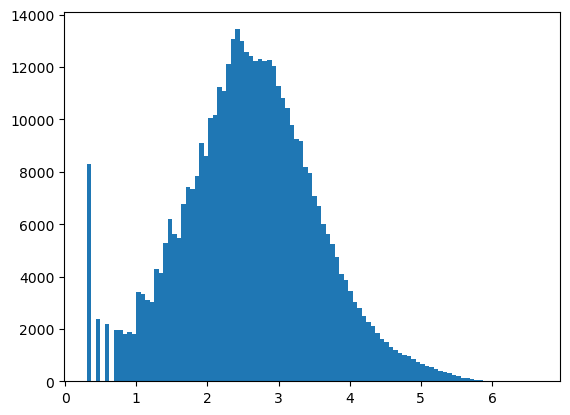

In [11]:
# Data seems to be normally distributed by log. 

tlist = []
for i in range(len(clf.filled_entries)):
    j, k = clf.filled_entries[i]
    tlist.append(log_df.iat[j, k])
import matplotlib.pyplot as plt
plt.hist(tlist, bins=100)
#plt.yscale('log')
plt.show()